In [30]:
import pandas as pd
br = pd.read_csv('/content/Sky_rose_Dataset_Beer.csv')
br.head()

,Week,Craft Beer: (Canada)
0,30/08/2020,7
1,06/09/2020,6
2,13/09/2020,6
3,20/09/2020,5
4,27/09/2020,6


In [31]:
br.duplicated().sum()

np.int64(0)

In [32]:
br.isnull().sum()

,0
Week,0
Craft Beer: (Canada),0


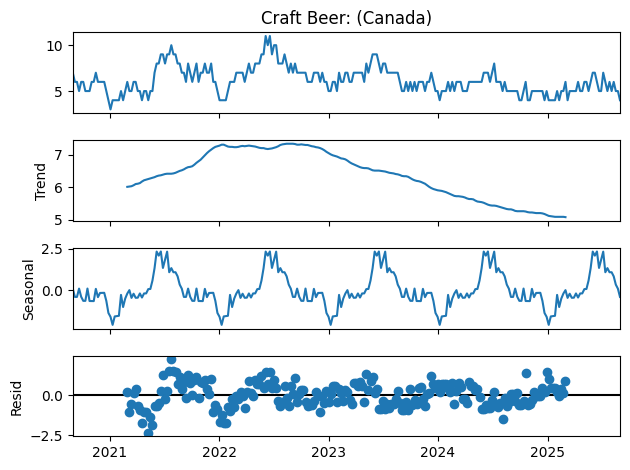

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Convert 'Week' column to datetime
br['Week'] = pd.to_datetime(br['Week'], format='%d/%m/%Y')

# Set 'Week' as index for time series decomposition
br = br.set_index('Week')

# Decompose the time series
decomposition = seasonal_decompose(br['Craft Beer: (Canada)'], model='additive')

# Plot the decomposed components
fig = decomposition.plot()
plt.show()

In [34]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate 3-week moving average
br['Moving_Average'] = br['Craft Beer: (Canada)'].rolling(window=3).mean()

# Drop the first two rows as moving average will be NaN
br_ma = br.dropna()

# Calculate errors
# Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(br_ma['Craft Beer: (Canada)'], br_ma['Moving_Average'])

# Mean Squared Error (MSE)
mse = mean_squared_error(br_ma['Craft Beer: (Canada)'], br_ma['Moving_Average'])

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f"MAPE: {mape:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

MAPE: 7.30%
MSE: 0.29
RMSE: 0.54


In [35]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate 5-week moving average
br['Moving_Average_5_week'] = br['Craft Beer: (Canada)'].rolling(window=5).mean()

# Drop the first four rows as moving average will be NaN for a 5-week window
br_ma_5 = br.dropna(subset=['Moving_Average_5_week'])

# Display the 5-week moving average
display(br[['Craft Beer: (Canada)', 'Moving_Average_5_week']].head())
display(br[['Craft Beer: (Canada)', 'Moving_Average_5_week']].tail())

# Calculate errors for 5-week moving average
# Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_5 = mean_absolute_percentage_error(br_ma_5['Craft Beer: (Canada)'], br_ma_5['Moving_Average_5_week'])

# Mean Squared Error (MSE)
mse_5 = mean_squared_error(br_ma_5['Craft Beer: (Canada)'], br_ma_5['Moving_Average_5_week'])

# Root Mean Squared Error (RMSE)
rmse_5 = np.sqrt(mse_5)

print(f"MAPE for 5-week moving average: {mape_5:.2f}%")
print(f"MSE for 5-week moving average: {mse_5:.2f}")
print(f"RMSE for 5-week moving average: {rmse_5:.2f}")

,Craft Beer: (Canada),Moving_Average_5_week
Week,,
2020-08-30,7,NaN
2020-09-06,6,NaN
2020-09-13,6,NaN
2020-09-20,5,NaN
2020-09-27,6,6.0


,Craft Beer: (Canada),Moving_Average_5_week
Week,,
2025-08-03,5,5.8
2025-08-10,6,5.6
2025-08-17,5,5.4
2025-08-24,5,5.4
2025-08-31,4,5.0


MAPE for 5-week moving average: 9.19%
MSE for 5-week moving average: 0.47
RMSE for 5-week moving average: 0.69


In [36]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Fit the SES model to the data
ses_model = SimpleExpSmoothing(br['Craft Beer: (Canada)']).fit()

# Get the fitted values (the smoothed series)
smoothed_data = ses_model.fittedvalues

# Display the smoothed data
display(smoothed_data.head())
display(smoothed_data.tail())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


,0
Week,
2020-08-30,7.000000
2020-09-06,7.000000
2020-09-13,6.372275
2020-09-20,6.138589
2020-09-27,5.423869


,0
Week,
2025-08-03,5.782974
2025-08-10,5.291482
2025-08-17,5.736236
2025-08-24,5.274083
2025-08-31,5.102034


In [37]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate errors for SES
# Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_ses = mean_absolute_percentage_error(br['Craft Beer: (Canada)'], smoothed_data)

# Mean Squared Error (MSE)
mse_ses = mean_squared_error(br['Craft Beer: (Canada)'], smoothed_data)

# Root Mean Squared Error (RMSE)
rmse_ses = np.sqrt(mse_ses)

print(f"MAPE for SES: {mape_ses:.2f}%")
print(f"MSE for SES: {mse_ses:.2f}")
print(f"RMSE for SES: {rmse_ses:.2f}")

MAPE for SES: 10.89%
MSE for SES: 0.63
RMSE for SES: 0.79


In [38]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the DES model to the data (trend='add' for additive trend)
des_model = ExponentialSmoothing(br['Craft Beer: (Canada)'], trend='add').fit()

# Get the fitted values (the smoothed series with trend)
des_smoothed_data = des_model.fittedvalues

# Display the smoothed data
display(des_smoothed_data.head())
display(des_smoothed_data.tail())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


,0
Week,
2020-08-30,6.593587
2020-09-06,6.838945
2020-09-13,6.306819
2020-09-20,6.106903
2020-09-27,5.407490


,0
Week,
2025-08-03,5.768914
2025-08-10,5.280509
2025-08-17,5.721324
2025-08-24,5.262630
2025-08-31,5.090301


In [39]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate errors for DES
# Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_des = mean_absolute_percentage_error(br['Craft Beer: (Canada)'], des_smoothed_data)

# Mean Squared Error (MSE)
mse_des = mean_squared_error(br['Craft Beer: (Canada)'], des_smoothed_data)

# Root Mean Squared Error (RMSE)
rmse_des = np.sqrt(mse_des)

print(f"MAPE for DES: {mape_des:.2f}%")
print(f"MSE for DES: {mse_des:.2f}")
print(f"RMSE for DES: {rmse_des:.2f}")

MAPE for DES: 10.89%
MSE for DES: 0.63
RMSE for DES: 0.79


In [40]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the TES model to the data (trend='add', seasonal='add' for additive trend and seasonality)
# We also need to specify the seasonal periods, which is likely 52 for weekly data
tes_model = ExponentialSmoothing(br['Craft Beer: (Canada)'], trend='add', seasonal='add', seasonal_periods=52).fit()

# Get the fitted values (the smoothed series with trend and seasonality)
tes_smoothed_data = tes_model.fittedvalues

# Display the smoothed data
display(tes_smoothed_data.head())
display(tes_smoothed_data.tail())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


,0
Week,
2020-08-30,6.681901
2020-09-06,6.148971
2020-09-13,6.114430
2020-09-20,6.266528
2020-09-27,5.534675


,0
Week,
2025-08-03,5.429000
2025-08-10,5.248836
2025-08-17,4.964287
2025-08-24,4.842770
2025-08-31,4.242289


In [41]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate errors for TES
# Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_tes = mean_absolute_percentage_error(br['Craft Beer: (Canada)'], tes_smoothed_data)

# Mean Squared Error (MSE)
mse_tes = mean_squared_error(br['Craft Beer: (Canada)'], tes_smoothed_data)

# Root Mean Squared Error (RMSE)
rmse_tes = np.sqrt(mse_tes)

print(f"MAPE for TES: {mape_tes:.2f}%")
print(f"MSE for TES: {mse_tes:.2f}")
print(f"RMSE for TES: {rmse_tes:.2f}")

MAPE for TES: 7.97%
MSE for TES: 0.36
RMSE for TES: 0.60


In [42]:
import pandas as pd

error_data = {'Model': ['3-Week Moving Average', '5-Week Moving Average', 'SES', 'DES', 'TES'],
              'MAPE (%)': [mape, mape_5, mape_ses, mape_des, mape_tes],
              'MSE': [mse, mse_5, mse_ses, mse_des, mse_tes],
              'RMSE': [rmse, rmse_5, rmse_ses, rmse_des, rmse_tes]}

error_df = pd.DataFrame(error_data)

display(error_df)

,Model,MAPE (%),MSE,RMSE
0,3-Week Moving Average,7.303595,0.292308,0.540655
1,5-Week Moving Average,9.193010,0.473488,0.688105
2,SES,10.893175,0.629594,0.793470
3,DES,10.893213,0.628673,0.792889
4,TES,7.969880,0.359480,0.599566


In [43]:
display(forecast_tes)

,0
2025-09-07,4.168563
2025-09-14,4.368711
2025-09-21,4.168691
2025-09-28,3.968702
2025-10-05,3.768802
2025-10-12,4.368858
2025-10-19,3.768832
2025-10-26,3.968835
2025-11-02,3.968885
2025-11-09,4.768883


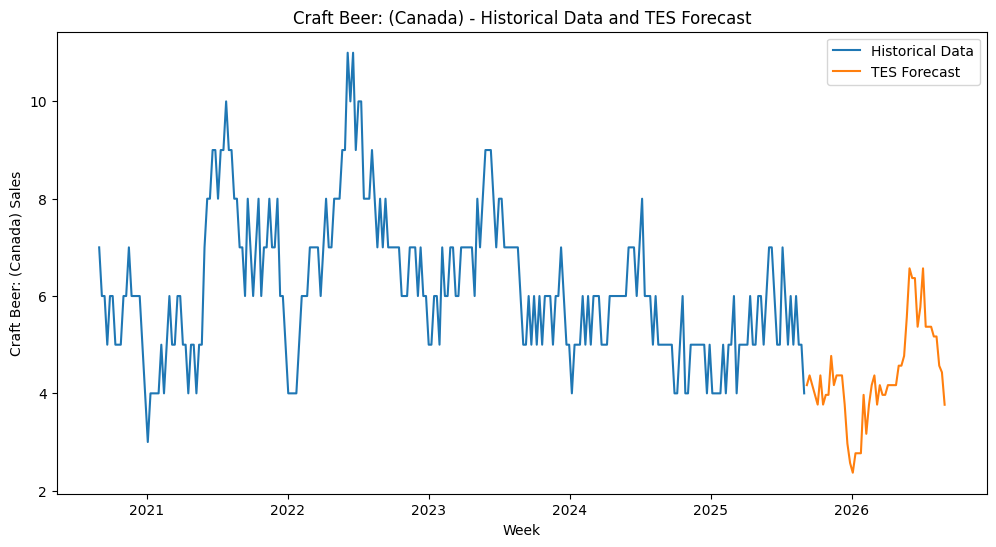

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(br.index, br['Craft Beer: (Canada)'], label='Historical Data')
plt.plot(forecast_tes.index, forecast_tes, label='TES Forecast')
plt.title('Craft Beer: (Canada) - Historical Data and TES Forecast')
plt.xlabel('Week')
plt.ylabel('Craft Beer: (Canada) Sales')
plt.legend()
plt.show()

In [45]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test
adf_test = adfuller(br['Craft Beer: (Canada)'])

# Display the results
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical Values:')
for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.386668
p-value: 0.011422
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573


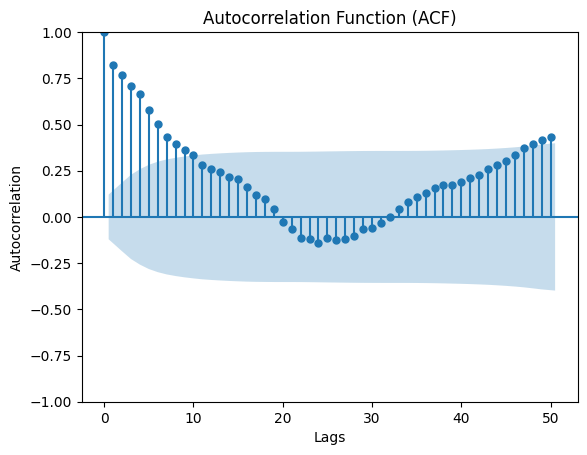

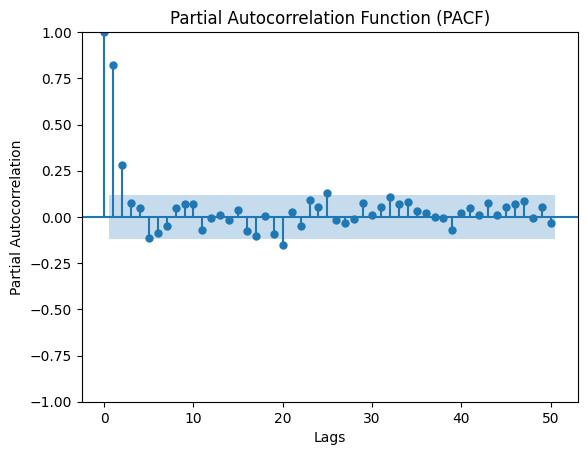

In [46]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF
plot_acf(br['Craft Beer: (Canada)'], lags=50)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

# Plot PACF
plot_pacf(br['Craft Beer: (Canada)'], lags=50)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [48]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARMA(1,1) model (ARIMA(1, 0, 1))
# The order (p, d, q) are the parameters for the AR, Integrated, and MA components
# Based on ACF and PACF plots, we might need to determine appropriate orders.
# For now, we'll start with a simple ARMA(1,1) as an example (ARIMA(1, 0, 1)).
model_arma = ARIMA(br['Craft Beer: (Canada)'], order=(1, 0, 1))
results_arma = model_arma.fit()

# Display the model summary
print(results_arma.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


                                SARIMAX Results                                 
Dep. Variable:     Craft Beer: (Canada)   No. Observations:                  262
Model:                   ARIMA(1, 0, 1)   Log Likelihood                -307.423
Date:                  Sun, 07 Sep 2025   AIC                            622.845
Time:                          09:26:31   BIC                            637.119
Sample:                      08-30-2020   HQIC                           628.582
                           - 08-31-2025                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1267      0.431     14.214      0.000       5.282       6.971
ar.L1          0.9250      0.026     35.296      0.000       0.874       0.976
ma.L1         -0.3306      0.065    

In [49]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Get the fitted values from the ARMA model
arma_fitted_values = results_arma.fittedvalues

# Calculate errors for ARMA
# Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_arma = mean_absolute_percentage_error(br['Craft Beer: (Canada)'], arma_fitted_values)

# Mean Squared Error (MSE)
mse_arma = mean_squared_error(br['Craft Beer: (Canada)'], arma_fitted_values)

# Root Mean Squared Error (RMSE)
rmse_arma = np.sqrt(mse_arma)

print(f"MAPE for ARMA(1,1): {mape_arma:.2f}%")
print(f"MSE for ARMA(1,1): {mse_arma:.2f}")
print(f"RMSE for ARMA(1,1): {rmse_arma:.2f}")

MAPE for ARMA(1,1): 10.82%
MSE for ARMA(1,1): 0.61
RMSE for ARMA(1,1): 0.78


In [50]:
# Forecast the next 52 weeks (1 year) using the fitted ARMA model
forecast_arma = results_arma.forecast(steps=52)

# Display the forecast
display(forecast_arma)

,predicted_mean
2025-09-07,4.556092
2025-09-14,4.673858
2025-09-21,4.782795
2025-09-28,4.883562
2025-10-05,4.976774
2025-10-12,5.062996
2025-10-19,5.142753
2025-10-26,5.216530
2025-11-02,5.284774
2025-11-09,5.347901


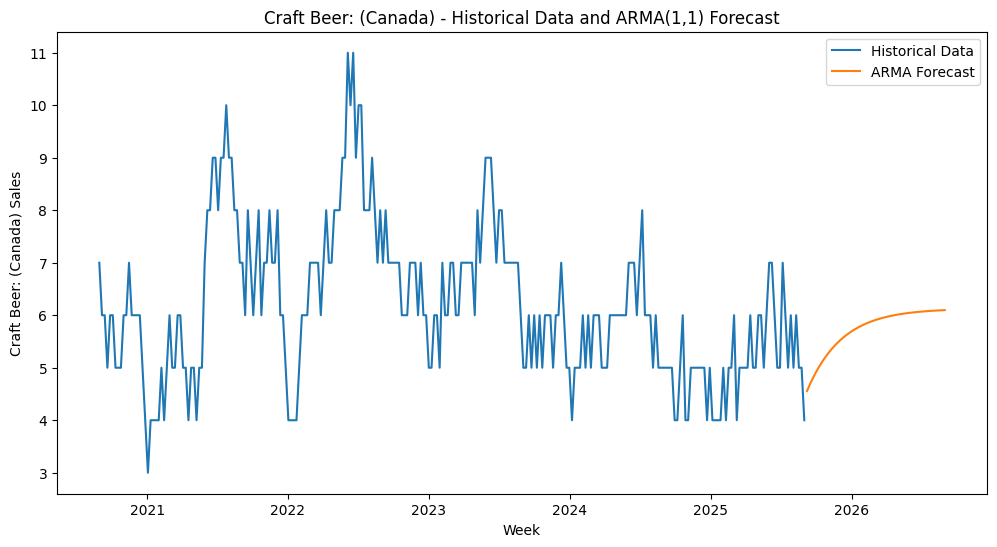

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(br.index, br['Craft Beer: (Canada)'], label='Historical Data')
plt.plot(forecast_arma.index, forecast_arma, label='ARMA Forecast')
plt.title('Craft Beer: (Canada) - Historical Data and ARMA(1,1) Forecast')
plt.xlabel('Week')
plt.ylabel('Craft Beer: (Canada) Sales')
plt.legend()
plt.show()

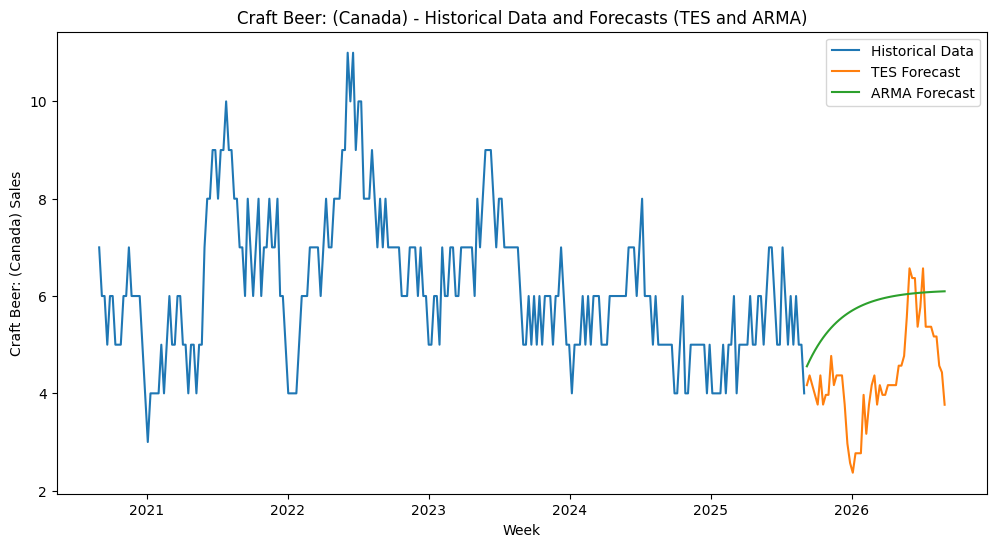

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(br.index, br['Craft Beer: (Canada)'], label='Historical Data')
plt.plot(forecast_tes.index, forecast_tes, label='TES Forecast')
plt.plot(forecast_arma.index, forecast_arma, label='ARMA Forecast')
plt.title('Craft Beer: (Canada) - Historical Data and Forecasts (TES and ARMA)')
plt.xlabel('Week')
plt.ylabel('Craft Beer: (Canada) Sales')
plt.legend()
plt.show()